In [17]:
import json

path = '/Users/katrina/Desktop/mastodon_data.json'

# read the json ffile (mastodon_data)
with open(path, "r") as file:
    json_data = json.load(file)

In [18]:
import re 

filtered_transport_json = []
unique_transport_content = set()
if isinstance(json_data, list):
    for transport_json in json_data:
        language = transport_json.get("language")
        content = transport_json.get("content")
        if language == "en":
            if re.search(r"\b(?:taxi|airplane|walk|bus|car|bike|tram|metro|publictransport|lightrail|traffic jam|public transport|uber|railway|train|transit|airport|signal|parking lot|travel|safety)\b", content, re.IGNORECASE):
                # to filter the same json file
                if content not in unique_transport_content:
                    filtered_transport_json.append(transport_json)
                    unique_transport_content.add(content)

In [19]:
from textblob import TextBlob

transport_scores = []
transport_labels = []

for transport_json in filtered_transport_json:
    transport_content = transport_json['content']
    transport_sentiment_score = TextBlob(transport_content).sentiment.polarity

    if transport_sentiment_score > 0:
        transport_sentiment = "Positive"
    elif transport_sentiment_score == 0:
        transport_sentiment = "Neutral"
    else:
        transport_sentiment = "Negative"
    
    # print(transport_content)
    # print(transport_sentiment_score)

    transport_scores.append(transport_sentiment_score)
    transport_labels.append(transport_sentiment)

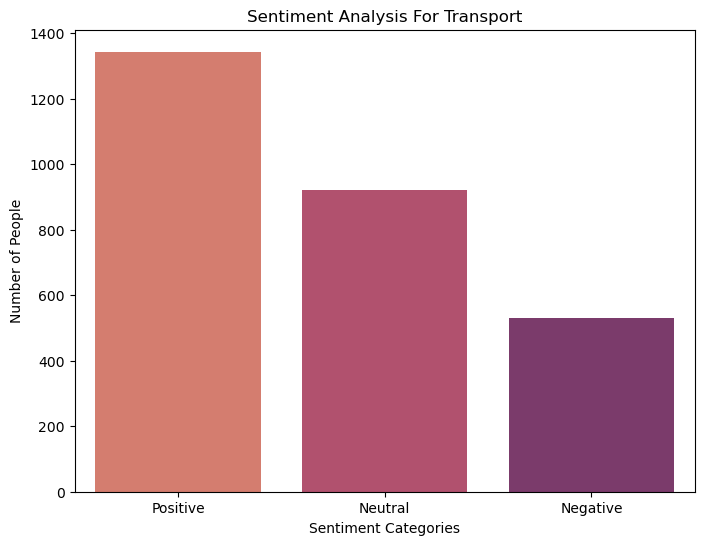

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the number of occurrences of each sentiment score
transport_sentiment_counts = {}
for sentiment in transport_labels:
    transport_sentiment_counts[sentiment] = transport_sentiment_counts.get(sentiment, 0) + 1

# convert dictionary to DataFrame
df_sentiment_transport = pd.DataFrame.from_dict(transport_sentiment_counts, orient='index', columns=['Counts'])
df_sentiment_transport.reset_index(inplace=True)
df_sentiment_transport = df_sentiment_transport.rename(columns={'index': 'Sentiment'})

# draw a bar chart to show the result of snetiments analysis of transport
plt.figure(figsize=(8, 6))
sns.barplot(x = 'Sentiment', y = 'Counts', data = df_sentiment_transport, palette = "flare", order = ['Positive', 'Neutral', 'Negative'])

plt.xlabel('Sentiment Categories')
plt.ylabel('Number of People')
plt.title('Sentiment Analysis For Transport')
plt.show()

In [21]:
# analysis on the keyword- housing

filtered_housing_json = []
unique_housing_content = set()
if isinstance(json_data, list):
    for housing_json in json_data:
        language = housing_json.get("language")
        content = housing_json.get("content")
        if language == "en":
            if re.search(r"\b(?:rent|renting|rental|neighborhood|room|real estate|house|housing|eviction|construction|shelter|apartment|lease|tenant|landlord|building|deposit|utilities|sublet|roommate|vacancy|property)\b", content, re.IGNORECASE):
                # to filter the same json file
                if content not in unique_housing_content:
                    filtered_housing_json.append(housing_json)
                    unique_housing_content.add(content)

In [22]:
housing_scores = []
housing_labels = []

for housing_json in filtered_housing_json:
    # print(housing_json)
    housing_content = housing_json['content']
    housing_sentiment_score = TextBlob(housing_content).sentiment.polarity

    if housing_sentiment_score > 0:
        housing_sentiment = "Positive"
    elif housing_sentiment_score == 0:
        housing_sentiment = "Neutral"
    else:
        housing_sentiment = "Negative"
    
    # print(housing_content)
    # print(housing_sentiment_score)

    housing_scores.append(housing_sentiment_score)
    housing_labels.append(housing_sentiment)

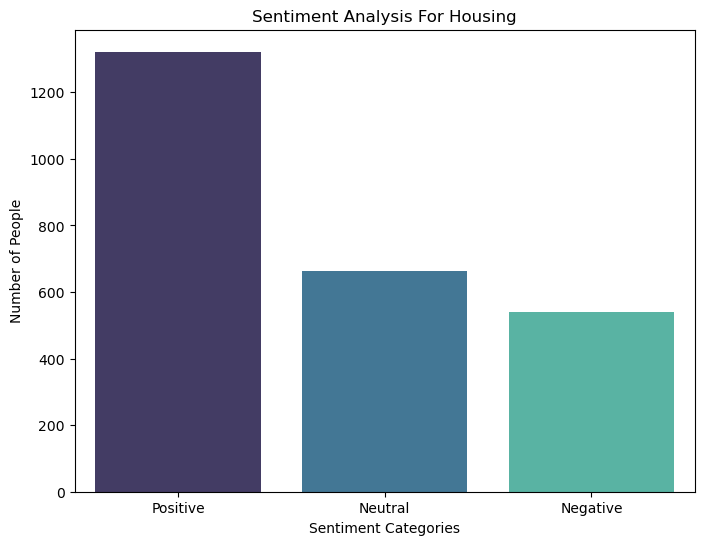

In [23]:
# calculate the number of occurrences of each sentiment score
housing_sentiment_counts = {}
for sentiment in housing_labels:
    housing_sentiment_counts[sentiment] = housing_sentiment_counts.get(sentiment, 0) + 1

df_sentiment_housing = pd.DataFrame.from_dict(housing_sentiment_counts, orient='index', columns=['Count'])
df_sentiment_housing.reset_index(inplace=True)
df_sentiment_housing = df_sentiment_housing.rename(columns={'index': 'Sentiment'})

# draw a bar chart to show the result of snetiments analysis of housing
plt.figure(figsize=(8, 6))
sns.barplot(x = 'Sentiment', y = 'Count', data = df_sentiment_housing, palette = "mako", order = ['Positive', 'Neutral', 'Negative'])
plt.xlabel('Sentiment Categories')
plt.ylabel('Number of People')
plt.title('Sentiment Analysis For Housing')
plt.show()

In [24]:
# analysis on the keyword - income

filtered_income_json = []
unique_income_content = set()
if isinstance(json_data, list):
    for income_json in json_data:
        language = income_json.get("language")
        content = income_json.get("content")
        if language == "en":
            if re.search(r"\b(?:income|salary|wage|earnings|money|paycheck|benefits|bonus|commission|taxes|deductions|payroll|financial|investment|profit|revenue|earn|budget|savings)\b", content, re.IGNORECASE):
                # to filter the same json file
                if content not in unique_income_content:
                    filtered_income_json.append(income_json)
                    unique_income_content.add(content)

In [25]:
income_scores = []
income_labels = []

for income_json in filtered_income_json:
    # print(income_json)
    income_content = income_json['content']
    income_sentiment_score = TextBlob(income_content).sentiment.polarity

    if income_sentiment_score > 0:
        income_sentiment = "Positive"
    elif income_sentiment_score == 0:
        income_sentiment = "Neutral"
    else:
        income_sentiment = "Negative"
    
    # print(income_content)
    # print(income_sentiment_score)

    income_scores.append(income_sentiment_score)
    income_labels.append(income_sentiment)

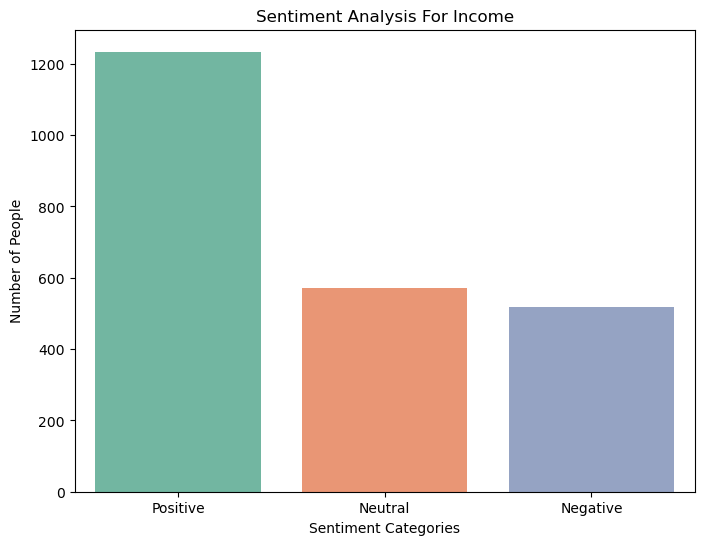

In [26]:
# calculate the number of occurrences of each sentiment score
income_sentiment_counts = {}
for sentiment in income_labels:
    income_sentiment_counts[sentiment] = income_sentiment_counts.get(sentiment, 0) + 1

df_sentiment_income = pd.DataFrame.from_dict(income_sentiment_counts, orient='index', columns=['Count'])
df_sentiment_income.reset_index(inplace=True)
df_sentiment_income = df_sentiment_income.rename(columns={'index': 'Sentiment'})

# draw a bar chart to show the result of snetiments analysis of housing
plt.figure(figsize=(8, 6))
sns.barplot(x = 'Sentiment', y = 'Count', data = df_sentiment_income, palette = "Set2", order = ['Positive', 'Neutral', 'Negative'])
plt.xlabel('Sentiment Categories')
plt.ylabel('Number of People')
plt.title('Sentiment Analysis For Income')
plt.show()